In [6]:
#Obtengo las corrdenadas reales del centroide y las guardo en una lista de  listas

# Obtener values de los diccionarios
values_1 = list(resultado_ordenado_windows.values())
values_2 = resultado_2_lista

# Crear la lista de listas
resultado_final = []

# Iterar de 3 en 3
for i in range(0, len(values_2), 3):
    # Obtener los valores de las listas
    lista_1 = values_1[i]
    lista_2 = values_2[i]
    lista_3 = values_1[i+1]
    lista_4 = values_2[i+1]
    lista_5 = values_1[i+2]
    lista_6 = values_2[i+2]
    
    xy1=(lista_1[0]+lista_2[1],lista_1[1]+lista_2[2])
    xy2=(lista_3[0]+lista_4[1] -808 ,lista_3[1]+lista_4[2])
    xy3=(lista_5[0]+lista_6[1],lista_5[1]+lista_6[2] - 608)
    resultado_final.append([xy1,xy2,xy3])

# Mostrar el resultado
print(resultado_final)

[[(453.6678784489187, 245.57429157345263), (318.75223795765646, 294.76981006962535), (480.33030541699486, 327.474420232782)], [(410.9245191067282, 352.75254421924717), (346.1762861621776, 190.52185169350625), (424.99141445195966, 129.92391428115957)], [(392.9225587672149, 224.3656139703338), (376.34024019380445, 244.24341528787176), (424.08680466664225, 307.8479135427715)], [(310.6721437790149, 248.87440525494577), (455.6216640182538, 212.81430550462454), (328.6856607547861, 266.6771803287926)], [(276.5629196075056, 201.76257531416766), (493.6809814553242, 341.12183897571424), (287.3618264809419, 425.39977430058434)], [(230.64636438829987, 275.9072361330426), (527.8401829747695, 302.2883996855121), (244.91384080671347, 323.5124276861866)], [(357.751246043929, 254.3600924820437), (551.0301995583545, 260.88594912897685), (382.891980645673, 278.044150075355)], [(397.1972706226392, 268.664359692945), (362.8659665810851, 204.83315796119365), (424.66953911874646, 234.62510817728185)], [(428.

normalizando datos de entrada a la red MLP. Osea las coordenadas/400

In [8]:
#normalizando valores :
#relaciones_diametros_normalizado=[]
#for lst in relaciones_diametros:
    #relaciones_diametros_normalizado.append([lst[0]*50,lst[1]*50,lst[2]*50])

resultado_final_normalizado=[]
for lst1 in resultado_final:
    resultado_final_normalizado.append([(lst1[0][0]/400,lst1[0][1]/400),(lst1[1][0]/400,lst1[1][1]/400),(lst1[2][0]/400,lst1[2][1]/400)])
    

estimacion: uso del modelo ya entrenado------iniio------

In [48]:
#modelo de 1 capa
# para abrirlo en otro archivo python
import torch
import torch.nn as nn

# Definir la arquitectura del modelo (asegúrate de que sea la misma arquitectura)
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Crear una instancia del modelo con la misma arquitectura
loaded_model = MLPModel(input_size=6, hidden_size=16, output_size=3)

# Cargar los pesos entrenados desde el archivo
loaded_model.load_state_dict(torch.load('modelo_entrenado_pelota_16_3000.pth'))

<All keys matched successfully>

In [9]:
#para 2 capas:
import torch
import torch.nn as nn

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
    
# Crear el modelo con la nueva arquitectura
loaded_model = MLPModel(input_size=6, hidden_size1=8, hidden_size2=8, output_size=3)
# Cargar los pesos entrenados desde el archivo
loaded_model.load_state_dict(torch.load('modelo_entrenado_pelota_8_8_1000.pth'))

<All keys matched successfully>

In [10]:
#hago las estimaciones con el modelo entrenado previo
estimaciones=[]
for lst in resultado_final_normalizado:
    x1=lst[0][0]
    y1=lst[0][1]
    x2=lst[1][0]
    y2=lst[1][1]
    x3=lst[2][0]
    y3=lst[2][1]
    coordenadas_centroide = [x1, y1, x2, y2, x3, y3]
    sample_input = torch.FloatTensor([coordenadas_centroide])  # Ajusta según tus datos de entrada
    # Asegúrate de que el modelo esté en modo de evaluación
    loaded_model.eval()
    # Realiza la predicción
    with torch.no_grad():
        predicted_output = loaded_model(sample_input)
    a = predicted_output.numpy()
    lista_temp = a[0].tolist()
    estimaciones.append(lista_temp)


In [11]:
estimaciones

[[1.284685492515564, 1.2366573810577393, 1.152193307876587],
 [1.2763959169387817, 1.2180516719818115, 1.1719733476638794],
 [1.2914879322052002, 1.2519254684448242, 1.1359615325927734],
 [1.2899246215820312, 1.2484166622161865, 1.1396918296813965],
 [1.2872576713562012, 1.2424306869506836, 1.1460555791854858],
 [1.2735681533813477, 1.2216402292251587, 1.1572582721710205],
 [1.2872322797775269, 1.2422813177108765, 1.1463159322738647],
 [1.2877497673034668, 1.2435351610183716, 1.1448813676834106],
 [1.2926450967788696, 1.2537825107574463, 1.1347994804382324],
 [1.2734431028366089, 1.2290973663330078, 1.1408417224884033],
 [1.2843658924102783, 1.2359400987625122, 1.1529558897018433],
 [1.2793545722961426, 1.2337158918380737, 1.1454209089279175],
 [1.2327626943588257, 1.1805176734924316, 1.145613193511963],
 [1.2982455492019653, 1.2670928239822388, 1.1198368072509766],
 [1.2823041677474976, 1.2313125133514404, 1.1578755378723145],
 [1.2282294034957886, 1.1965563297271729, 1.09980452060699

In [14]:
#multiplicacion de las estimaciones de las relaciones con los diametros(px) nuevos
lst_long_reales_estimadas=[]
for i in range(len(estimaciones)):
    lst_temp_1 = estimaciones[i]
    lst_temp_2 = diametros_pixeles[i]
    lr1 = lst_temp_1[0]*lst_temp_2[0]/50
    lr2 = lst_temp_1[1]*lst_temp_2[1]/50
    lr3 = lst_temp_1[2]*lst_temp_2[2]/50
    lst_long_reales_estimadas.append([lr1,lr2,lr3])

In [17]:
#lista de tamaños reales para poder comparar
lista_d_reales=[]
for lst in resultado_tamanos_reales:
    d_real = lst[1]
    lista_d_reales.append(d_real)

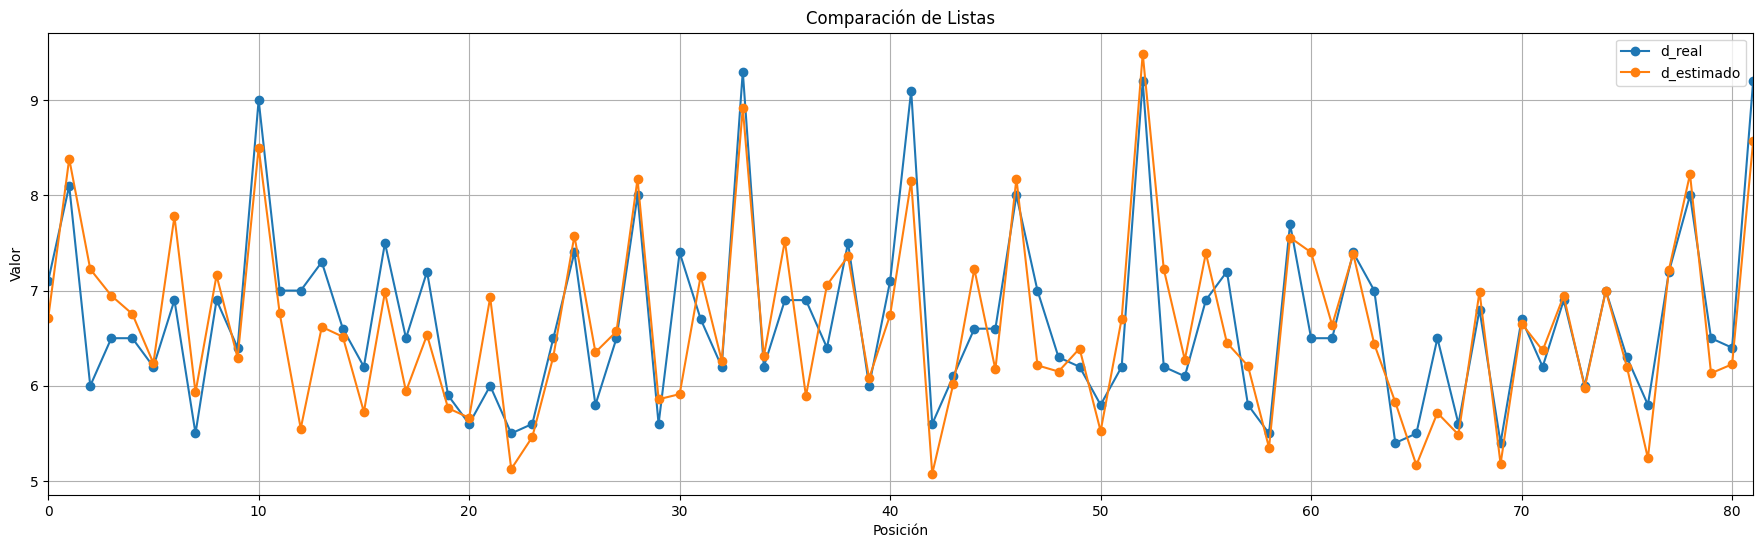

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo de dos listas de datos
lista1 = np.array(lista_d_reales[70:])
lista2 = np.array(mayores_valores[70:])-1.06

plt.figure(figsize=(22, 6))

# Crear una gráfica de líneas para comparar las dos listas
plt.plot(lista1, label='d_real', marker='o', linestyle='-')
plt.plot(lista2, label='d_estimado', marker='o', linestyle='-')

# Añadir etiquetas a los ejes
plt.xlabel('Posición')
plt.ylabel('Valor')

# Añadir un título a la gráfica
plt.title('Comparación de Listas')

# Establecer límites en el eje x
plt.xlim(0, len(lista1)-1)

# Ajustar los ticks en el eje y
#plt.yticks(np.arange(min(lista2), max(lista2)+0.5, 0.1))

# Mostrar una leyenda para identificar las líneas
plt.legend()

# Mostrar la gráfica
plt.grid()
plt.show()